In [1]:
function EDO_pendulo_doble(t,variables,ω² = 1)
    # alpha = \theta1-\theta2
    l = 1
    m = 1
    α = variables[1]-variables[2]
    dθ_1 = 6/(m*l^2)*(2*variables[3]-3*variables[4]*cos(α))/(16-9*(cos(α))^2)
    dθ_2 = 6/(m*l^2)*(8*variables[4]-3*cos(α)*variables[3])/(16-9*(cos(α))^2)
    dp_1 = -1/2*(m*l^2)*(dθ_1*dθ_2*sin(α)+3*ω²*sin(variables[1]) )
    dp_2 = -1/2*(m*l^2)*(-dθ_1*dθ_2*sin(α) + ω²*sin(variables[2]))
    
    return[dθ_1, dθ_2, dp_1, dp_2]
end

function generador_fractal(θ_1, θ_2, t_0, t_f, δ, ϵ)
   #matriz de ceros donde se aneará si el angulo da vuelta o no
    valores = zeros(length(θ_1), length(θ_2))
    
    #Número de pasos de tiempo que se darán antes de inicial a corroborar las soluciones
    pasos = 18
    
    #ciclo para barrer en todos los ángulos
    for i in 1:length(θ_1)
        for j in 1:length(θ_2)
            #empezamos a descartar los ángulos que sabemos que no giraran
            if 3*cos(θ_1[i]) + cos(θ_2[j]) > 2
                valores[j,i] = t_f+3
            
            #para los valores que sabemos que van a girar
            else
                #Calculando la solución para primero pasos de tiempo
                t_1 = t_0
                solucion_t_1 = [θ_1[i], θ_2[j],0,0]
                
                t_2 = t_0
                solucion_t_2 = [θ_1[i], θ_2[j],0,0]
                
                
                for i in 1:pasos
                    t_1 = t_1 + δ
                    #obtenemos la solución del siguiente tiempo
                    k1_1 = EDO_pendulo_doble(t_1, solucion_t_1)
                    k2_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1 .+ 0.5*δ.*k1_1)
                    k3_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1.+ 0.5*δ.*k2_1 )
                    k4_1 = EDO_pendulo_doble(t_1 + δ, solucion_t_1.+ δ.*k2_1)
                    solucion_t_1 = solucion_t_1 .+ (δ/6.0).*(k1_1 .+ 2.0.*k2_1 .+ 2.0.*k3_1 .+ k4_1)
                    
                    t_2 = t_2 + δ
                    #obtenemos la solución del siguiente tiempo
                    k1_2 = EDO_pendulo_doble(t_2, solucion_t_2)
                    k2_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2 .+ 0.5*δ.*k1_2)
                    k3_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2.+ 0.5*δ.*k2_2)
                    k4_2 = EDO_pendulo_doble(t_2 + δ, solucion_t_2.+ δ.*k2_2)
                    solucion_t_2 = solucion_t_2 .+ (δ/6.0).*(k1_2 .+ 2.0.*k2_2 .+ 2.0.*k3_2 .+ k4_2)
                end 
                

                #buscamos el elemento de la solución tal que este alrededor de una vecindad epsilon de π
                while abs(abs(solucion_t_1[1])-π) > ϵ #
                    t_1 = t_1 + δ
                #obtenemos la solución del siguiente tiempo
                    k1_1 = EDO_pendulo_doble(t_1, solucion_t_1)
                    k2_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1 .+ 0.5*δ.*k1_1)
                    k3_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1.+ 0.5*δ.*k2_1 )
                    k4_1 = EDO_pendulo_doble(t_1 + δ, solucion_t_1.+ δ.*k2_1)
                    solucion_t_1 = solucion_t_1 .+ (δ/6.0).*(k1_1 .+ 2.0.*k2_1 .+ 2.0.*k3_1 .+ k4_1)
                    if t_1 > t_f
                        break
                    end
                end
                
                
                
                while abs(abs(solucion_t_2[2])-π) > ϵ 
                    t_2 = t_2 + δ
                #obtenemos la solución del siguiente tiempo
                    k1_2 = EDO_pendulo_doble(t_2, solucion_t_2)
                    k2_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2 .+ 0.5*δ.*k1_2)
                    k3_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2.+ 0.5*δ.*k2_2)
                    k4_2 = EDO_pendulo_doble(t_2 + δ, solucion_t_2.+ δ.*k2_2)
                    solucion_t_2 = solucion_t_2 .+ (δ/6.0).*(k1_2 .+ 2.0.*k2_2 .+ 2.0.*k3_2 .+ k4_2)
                    if t_2 > t_f
                        break
                    end
                end
                
                    
                if abs(abs(solucion_t_1[1])-π) < ϵ || abs(abs(solucion_t_2[2])-π) < ϵ  
                    valores[j,i] = minimum([t_1,t_2])
                end
                
            end
        end
    end
    return valores
    
end

generador_fractal (generic function with 1 method)

541.300429 seconds (4.06 G allocations: 423.551 GiB, 11.87% gc time)


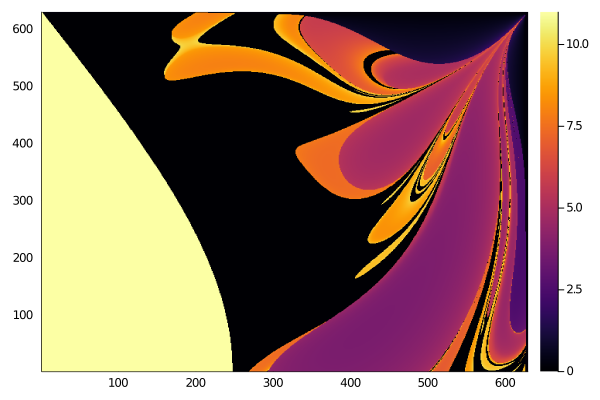

In [22]:
#con estos parametros se obtienen orillas finas
θ1 = collect(0:0.005:π)
θ2 = collect(0:0.005:π)
@time begin
datos = generador_fractal(θ1, θ2, 0, 10, 0.01, 0.02)
end
using Plots
heatmap(datos)

39581.052540 seconds (325.82 G allocations: 33.189 TiB, 10.45% gc time)


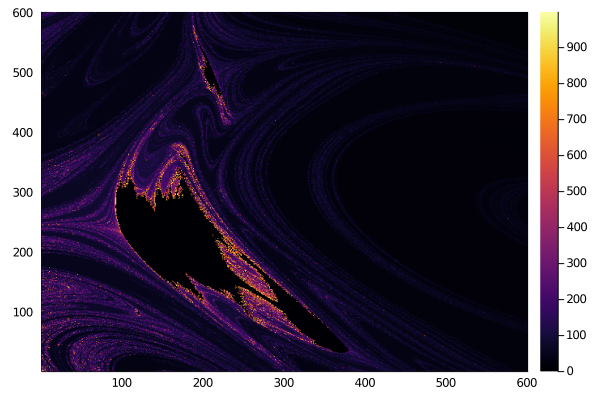

In [10]:
#con estos parametros se obtienen orillas finas
θ1 = collect(0.9:0.001:1.5)
θ2 = collect(1.7:0.001:2.3)
@time begin
datos = generador_fractal(θ1, θ2, 0, 1000, 0.01, 0.02)
end
using Plots
heatmap(datos)

In [11]:
using CSV, DataFrames
CSV.write("conjunto_1.csv", DataFrame(datos), header= false)

"conjunto_1.csv"

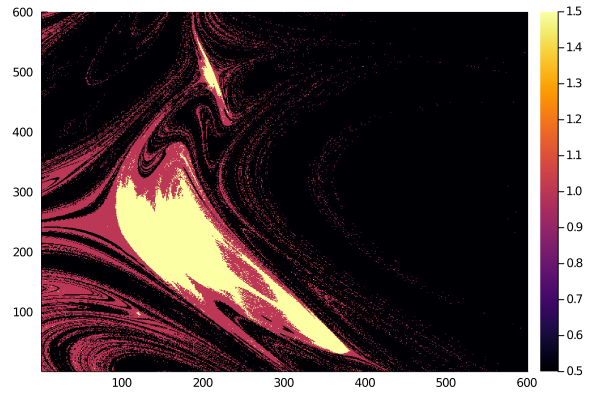

In [15]:
datos_1 = Matrix( CSV.read("conjunto_1.csv", DataFrame))
#ahora vamos a reescalar los datos para que se vean mejor el fractal
datos_1 = copy(datos_1)
for i in 1:length(datos_1) 
    if 0 < datos_1[i] <= 10
        datos_1[i] = 0
    elseif 10 < datos_1[i] <= 100
        datos_1[i] = 0.5
    elseif 100 <datos_1[i] <= 1000
        datos_1[i] = 1
    elseif datos_1[i]>1000
        datos_1[i] = 1.5
    else #elseif datos_1[i] ==0
        datos_1[i] = 1.5
    end
end
heatmap(datos_1)

In [ ]:
#con estos parametros se obtienen orillas finas
θ1 = collect(-π :0.005:0)
θ2 = collect(0:0.005:π)
@time begin
datos = generador_fractal(θ1, θ2, 0, 1000, 0.01, 0.02)
end
using Plots
heatmap(datos)
#para t = 01047.359440 

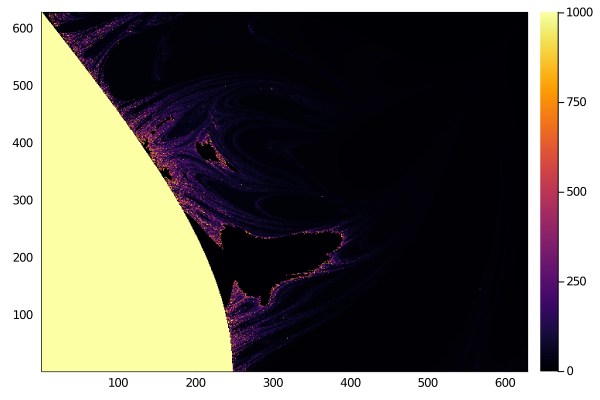

In [25]:
datos1 = Matrix( CSV.read("I_definitivo.csv", DataFrame))
heatmap(datos1)
#37773.159195 seconds (189.52 G allocations: 19.305 TiB, 11.59% gc time)


In [24]:
using CSV, DataFrames
CSV.write("I_definitivo.csv", DataFrame(datos), header = false)

"I_definitivo.csv"

In [31]:
#θ1 = collect(0:0.005:π)
#θ2 = collect(0:0.005:π)
#@time begin
#datos = generador_fractal(θ1, θ2, 0, 1000.01, 0.01, 0.08)
#end
#heatmap(datos)
#Para los datos de la segunda sección se tardó
#14127.108009  14127.108009 seconds (174.77 G allocations: 15.259 TiB, 8.29% gc time, 0.01% compilation time)
#Para los de la primera sección 
#27283.528669 seconds (187.47 G allocations: 16.368 TiB, 8.77% gc time, 0.00% compilation time)

using Plots, DataFrames, CSV

# Importando los datos

#datos1 = Matrix( CSV.read("I.csv", DataFrame))
datos2 = Matrix( CSV.read("II.csv", DataFrame) )
#datos1_1 = Matrix( CSV.read("I_orilla.csv", DataFrame) )#esto no lo use
#datos2_1 = Matrix( CSV.read("II_orilla.csv", DataFrame) );#esto tampoco
datos1 = Matrix( CSV.read("I_mejorado.csv", DataFrame));

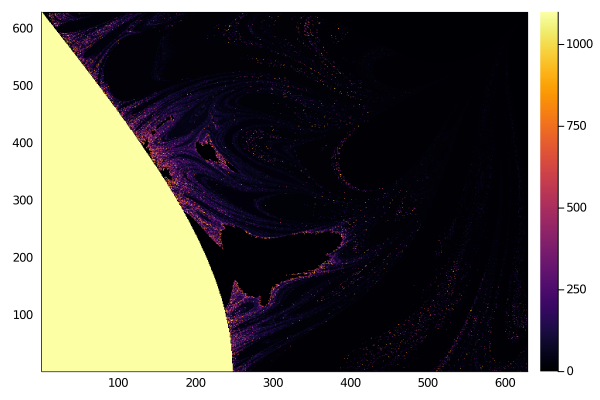

In [2]:
heatmap(datos2_mejorado)

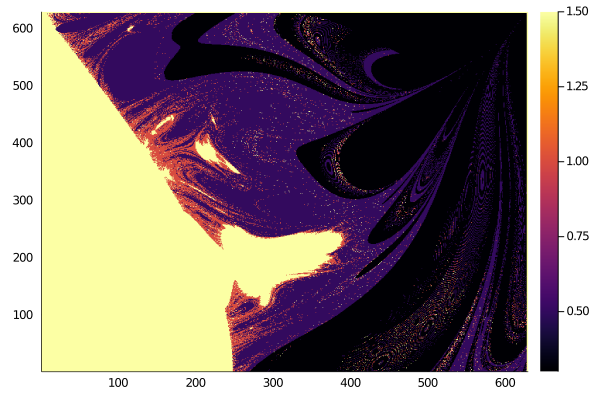

In [32]:
#ahora vamos a reescalar los datos para que se vean mejor el fractal
datos_1 = copy(datos1)
for i in 1:length(datos_1) 
    if 0 < datos_1[i] <= 10
        datos_1[i] = 0.3
    elseif 10 < datos_1[i] <= 100
        datos_1[i] = 0.5
    elseif 100 <datos_1[i] <= 1000
        datos_1[i] = 1
    elseif datos_1[i]>1000
        datos_1[i] = 1.5
    else #elseif datos_1[i] ==0
        datos_1[i] = 1.5
    end
end
heatmap(datos_1)

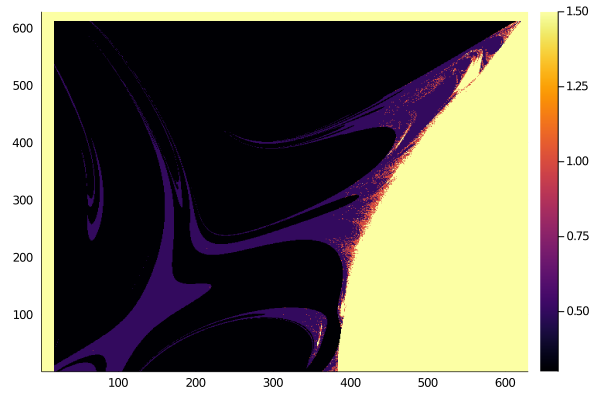

In [33]:
datos_2 = copy(datos2)
for i in 1:length(datos_2) 
    if 0 < datos_2[i] <= 10
        datos_2[i] = 0.3 
    elseif 10 < datos_2[i] <= 100
        datos_2[i] = 0.5
    elseif 100 <datos_2[i] <= 1000
        datos_2[i] = 1
    elseif datos_2[i]>1000
        datos_2[i] = 1.5
    else 
        datos_2[i] = 1.5
    end
end
heatmap(datos_2)

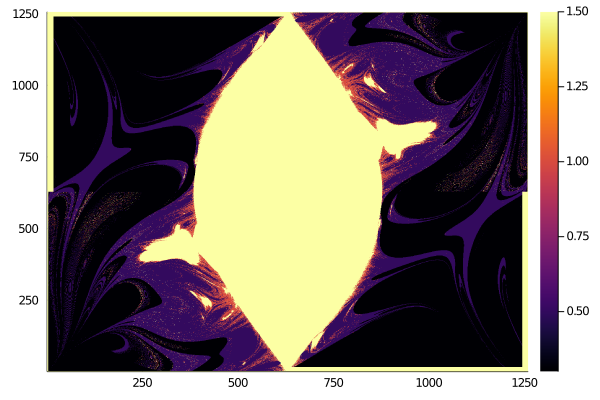

In [34]:
cuarto_cuadrante = zeros(628,629)
tercer_cuadrante = zeros(628,629)

for i in 0:length(datos_1)-1
    tercer_cuadrante[i+1] = datos_2[end-i]
end

for i in 0:length(datos_2)-1
    cuarto_cuadrante[i+1] = datos_1[end-i]
end

#unimos en dos trozos los cuatro cuadrantes
tercero_cuarto = hcat(cuarto_cuadrante , tercer_cuadrante)
primero_segundo = hcat(datos_2,datos_1 )

#unimos todo el fractal
fractal = vcat(tercero_cuarto, primero_segundo)
heatmap(fractal)

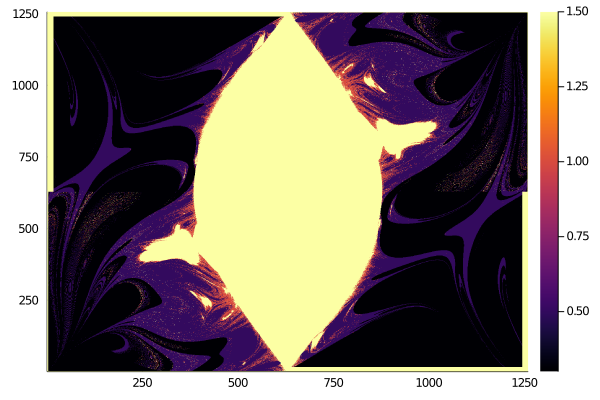

In [4]:
cuarto_cuadrante = zeros(628,629)
tercer_cuadrante = zeros(628,629)

for i in 0:length(datos_1)-1
    tercer_cuadrante[i+1] = datos_2[end-i]
end

for i in 0:length(datos_2)-1
    cuarto_cuadrante[i+1] = datos_1[end-i]
end

#unimos en dos trozos los cuatro cuadrantes
tercero_cuarto = hcat(cuarto_cuadrante , tercer_cuadrante)
primero_segundo = hcat(datos_2,datos_1 )

#unimos todo el fractal
fractal = vcat(tercero_cuarto, primero_segundo)
heatmap(fractal)

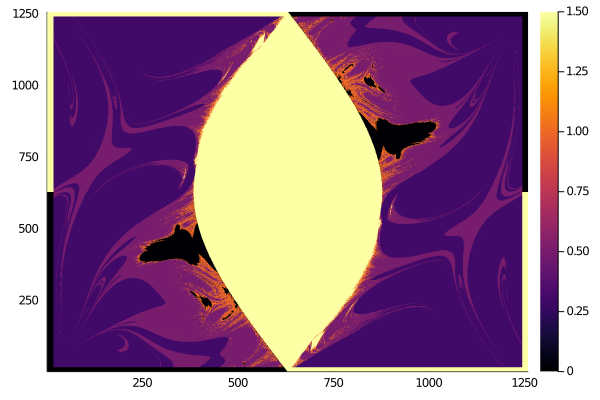

In [5]:
datos3 = Matrix( CSV.read("Fractal_orillas_raras.csv", DataFrame));
heatmap(datos3)

In [28]:
orilla_I = Matrix(CSV.read("I_orilla_fina.csv", DataFrame) );
#ahora vamos a reescalar los datos para que se vean mejor el fractal
datos_1 = copy(datos1)
for i in 1:length(datos_1) 
    if 0 < datos_1[i] < 10
        datos_1[i] = 0.3
    elseif 10 < datos_1[i] < 100
        datos_1[i] = 0.5
    elseif 100 <datos_1[i] < 1000
        datos_1[i] = 1
    elseif datos_1[i]>1000
        datos_1[i] = 1.5
    else #elseif datos_1[i] ==0
        datos_1[i] = 1.5
    end
end
heatmap(datos_1)

629×629 Array{Float64,2}:
 11.0  11.0   11.0   11.0   11.0   …  9.38  9.52  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0      9.34  9.45  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0      9.3   9.4   0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0      9.28  9.35  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0      9.26  9.31  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0   …  9.25  9.28  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0      9.26  9.25  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0      9.29  9.23  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0      9.38  9.22  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0      0.0   9.22  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0   …  0.0   9.24  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0      0.0   9.29  0.18  0.18  0.18  0.18
 11.0  11.0   11.0   11.0   11.0      0.0   9.43  0.18  0.18  0.18  0.18
  ⋮                      

In [ ]:
datos_1 = copy(datos1)
for i in 1:length(datos_1) 
    if 0 < datos_1[i] < 10
        datos_1[i] = 0.3
    elseif 10 < datos_1[i] < 100
        datos_1[i] = 0.5
    elseif 100 <datos_1[i] < 1000
        datos_1[i] = 1
    elseif datos_1[i]>1000
        datos_1[i] = 1.5
    else #elseif datos_1[i] ==0
        datos_1[i] = 1.5
    end
end
heatmap(datos_1)